In [1]:
import numpy as np
import cv2
from matplotlib.pyplot import plot
from pathlib import Path
from itertools import combinations
import utils

In [2]:
DATA_ROOT_PATH = Path('data')
IMG_PATH =  DATA_ROOT_PATH / 'q2a.png'
ANNOTATIONS_PATH = DATA_ROOT_PATH / 'q2' / 'q2a.npy'

COLORS = [(0, 255, 0), (0, 255, 255), (255, 255, 0), (255, 0, 0), (0, 0, 255)]

In [3]:
image = utils.load_image(IMG_PATH)

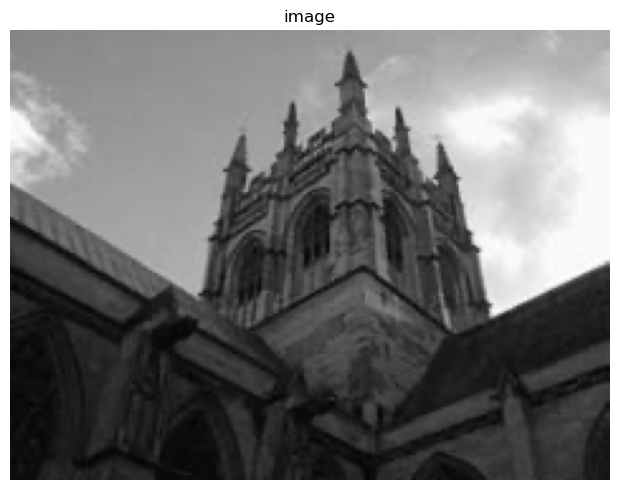

In [4]:
utils.show_images([image], ['image'])

In [5]:
annotations = np.load(ANNOTATIONS_PATH)

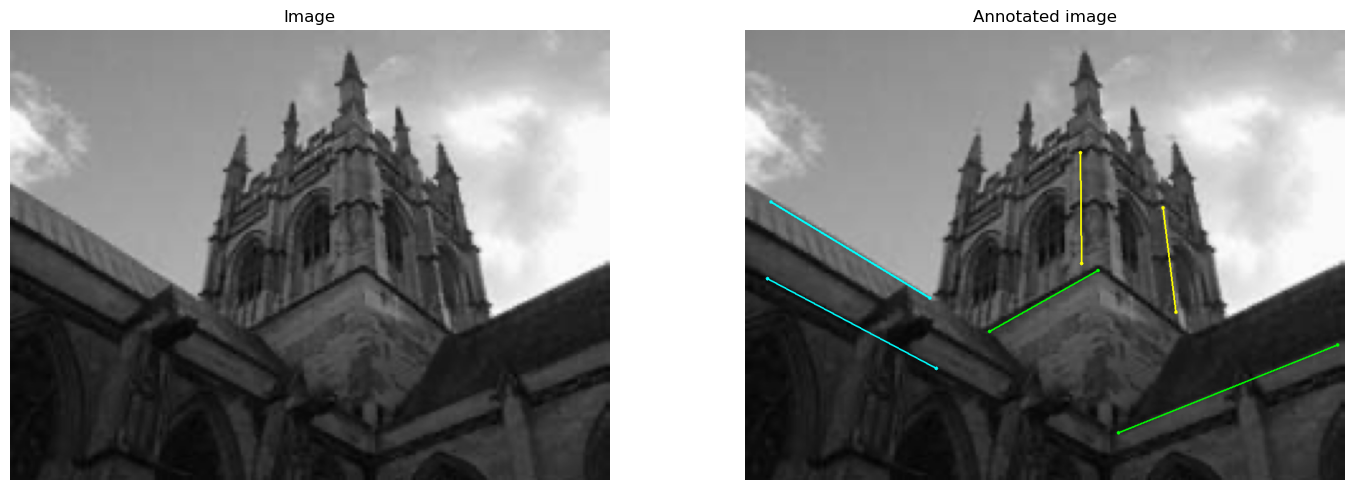

In [6]:
annotated_img = image.copy()

for i in range(annotations.shape[0]):
    COLOR = COLORS[i]
    lines = annotations[i]
    for j in range(lines.shape[0]):
        x1, y1, x2, y2 = lines[j]
        cv2.circle(annotated_img, (x1, y1), 3, COLOR, -1)
        cv2.circle(annotated_img, (x2, y2), 3, COLOR, -1)
        cv2.line(annotated_img, (x1, y1), (x2, y2), COLOR, 2)
        
utils.show_images([image, annotated_img], ['Image', 'Annotated image'])

In [7]:
print(annotations)
annotations.shape

[[[ 417  514  602  410]
  [ 637  687 1011  537]]

 [[ 574  398  572  209]
  [ 735  481  713  303]]

 [[ 315  457   44  293]
  [  38  424  326  577]]]


(3, 2, 4)

In [8]:
lines = []
for annotation in annotations:
    for one_line in annotation:
        p1 = [one_line[0], one_line[1], 1]
        p2 = [one_line[2], one_line[3], 1]
        
        line = np.cross(p1, p2)
        line = line / line[-1]
        
        lines.append(line)

v_points = []

for i in range(0, len(lines), 2):
    v_point = np.cross(lines[i], lines[i + 1])
    v_point = v_point / v_point[-1]

    v_points.append(v_point)

v_pairs = list(combinations(v_points, 2))
print(v_points)
print(v_pairs)

[array([-1.20464633e+03,  1.42562821e+03,  1.00000000e+00]), array([ 559.88532351, -935.83692793,    1.        ]), array([1.85940406e+03, 1.39162090e+03, 1.00000000e+00])]
[(array([-1.20464633e+03,  1.42562821e+03,  1.00000000e+00]), array([ 559.88532351, -935.83692793,    1.        ])), (array([-1.20464633e+03,  1.42562821e+03,  1.00000000e+00]), array([1.85940406e+03, 1.39162090e+03, 1.00000000e+00])), (array([ 559.88532351, -935.83692793,    1.        ]), array([1.85940406e+03, 1.39162090e+03, 1.00000000e+00]))]


In [9]:
v_points_image = image.copy()

In [10]:
# Constract the A matrix Aw = 0
A = []

for vp in v_pairs:
    xi = vp[0][0]
    yi = vp[0][1]
    xj = vp[1][0]
    yj = vp[1][1]

    equ = [xi * xj + yi * yj, xi + xj, yi + yj, 1]
    A.append(equ)

_, _, vt = np.linalg.svd(A)
W =  vt[-1]
W = W / W[-1]

W = [
        [W[0], 0, W[1]],
        [0, W[0], W[2]],
        [W[1], W[2], W[3]]
    ]

W

[[5.407161459160563e-07, 0, -0.0003109474738634216],
 [0, 5.407161459160563e-07, -0.00023355644024256956],
 [-0.0003109474738634216, -0.00023355644024256956, 1.0]]

In [11]:
L = np.linalg.cholesky(W)
K = np.linalg.inv(L).T
K = K / K[2, 2]
K

array([[ 1.15417802e+03,  0.00000000e+00,  5.75066005e+02],
       [-0.00000000e+00,  1.15417802e+03,  4.31939090e+02],
       [-0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])